In [33]:
from decision_tree import gini, predict, dtree
from sklearn.model_selection import GridSearchCV
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('balanced_credit.csv')

In [26]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

In [27]:
clf = tree.DecisionTreeClassifier(random_state=42)
# Define the hyperparameter grid for tuning
param_grid = {'max_depth': range(1,14),
              'min_samples_split': range(2, 20, 2),
              'criterion': ['gini', 'entropy']}

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 234 candidates, totalling 1170 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 14),
                         'min_samples_split': range(2, 20, 2)},
             verbose=1)

In [32]:
# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Use the best model to make predictions on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
Best score: 0.6983111438659899
Accuracy on test set: 0.6977094635322484


In [35]:
# Convert decision_tree grid search results to a csv
results = pd.DataFrame(grid_search.cv_results_)
results.to_csv('decision_tree_results.csv', index=False)

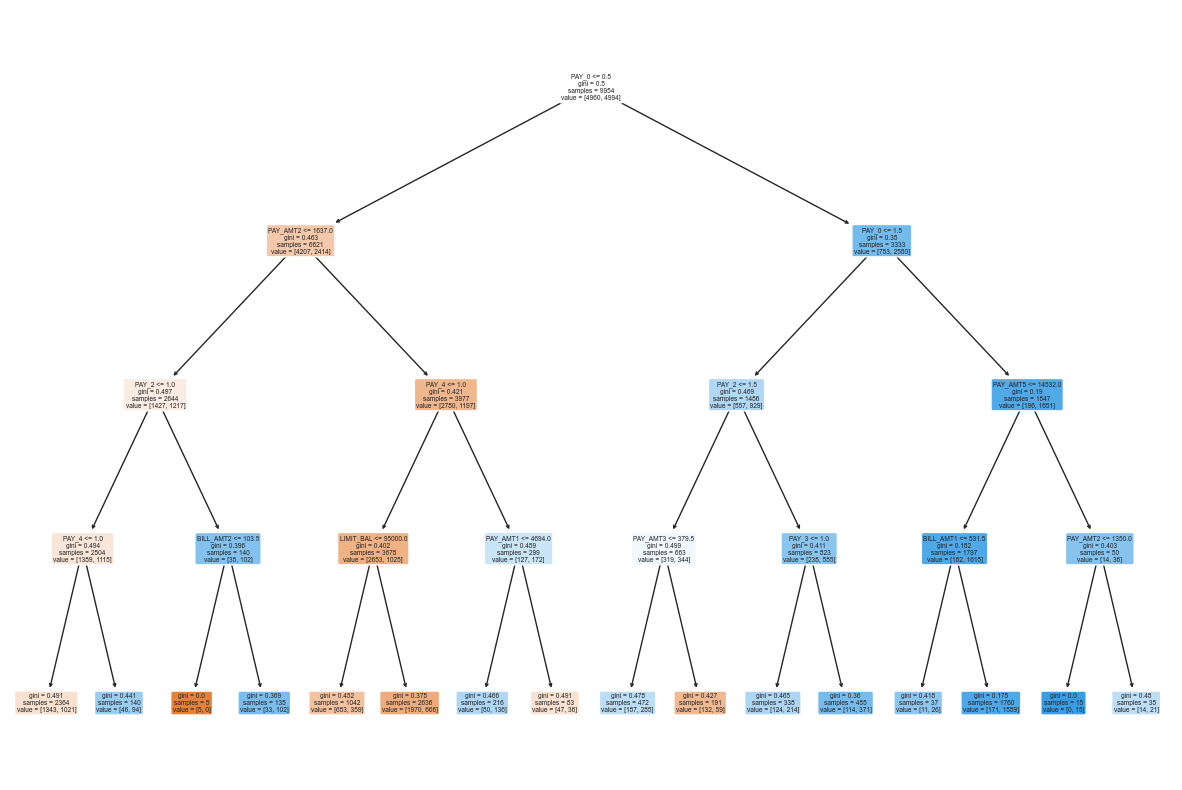

In [37]:
plt.figure()
plt.gcf().set_size_inches(15, 10)

tree.plot_tree(best_model,
               feature_names=X.columns, filled=True, rounded=True);

In [4]:
# Fit custom tree with discovered optimal params
tree = dtree(df, gini, max_depth=4, min_instances=2)

100%|██████████| 24/24 [00:20<00:00,  1.18it/s]


In [19]:
y_pred = predict(tree, X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.7001205545509342